In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

In [25]:
# These outputs have converged already
# file_name = "../sim_paths_mw_large_25.pkl"
# with open(file_name,'rb') as f:
#         average_cost_M2_, average_queue_M2, average_cost_M2, N, W, pmf_cust, pmf_serv = pickle.load(f)

# file_name = "../sim_paths_mw_large_25_2.pkl"
# with open(file_name,'rb') as f:
#         average_cost_M2_2_, average_queue_M2_2, average_cost_M2_2, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [27]:
file_name = "../sim_paths_mw_96-98_25.pkl"
with open(file_name,'rb') as f:
    average_cost_M2_, average_queue_M2, average_cost_M2, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [20]:
print( average_cost_M2 - average_cost_M2_ )

[0.00475542 0.00547423 0.00608298 0.00831708 0.01068933 0.01725956]


In [15]:
average_queue_M2

array([ 312.63552,  378.69529,  451.43863,  577.76318,  714.18607,
       1067.46123])

In [30]:
file_name = "../longest_spatial_uniform_25_all_good.pkl"
with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)

In [23]:
Q_paths_M = np.transpose( np.asarray( Q_paths_M)  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_new = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_cost_M_actual  = average_new

In [4]:
file_name = "../longest_spatial_uniform_25_for_c.pkl"
with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
Q_paths_M = np.transpose( np.asarray( Q_paths_M)  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_new = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_cost_M_actual  = average_new
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_new = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_cost_B_actual  = average_new

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

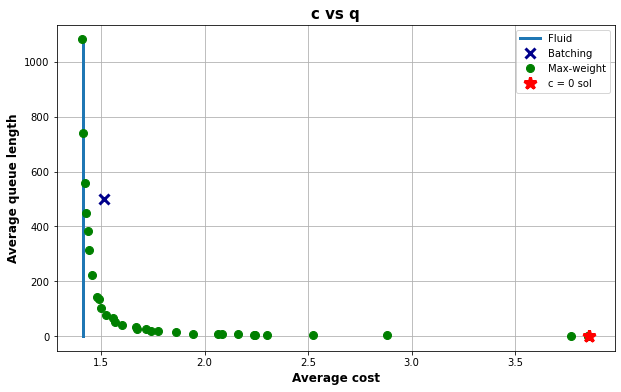

In [6]:
plot_from_sim_paths('../longest_spatial_uniform_25_for_c.pkl')

In [35]:
print( average_new - average_cost_M )

[3.85507957e-05 3.85900196e-05 3.76853925e-05 2.87576909e-05
 7.57435233e-05 6.89097023e-05 1.12147213e-04 1.11787658e-04
 6.48479036e-05 1.25295031e-04 1.85574045e-04 1.55040029e-04
 3.17355133e-04 3.17882272e-04 2.96679973e-04 4.12661735e-04
 3.84640952e-04 5.51955888e-04 7.03528209e-04 8.66254825e-04
 1.01221800e-03 9.91215250e-04 1.58897047e-03 2.13308900e-03
 3.60929895e-03 2.98185948e-03 3.59026134e-03 4.08424444e-03
 4.43845690e-03 4.98859374e-03 6.20453812e-03 6.29679988e-03
 7.20893058e-03 9.00366080e-03 1.06827008e-02 1.93005798e-03]


In [24]:
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_new = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_cost_B_actual  = average_new

In [37]:
print( average_new - average_cost_B )

[3.85525434e-05 6.90126540e-05 3.20230752e-05 1.21076246e-04
 1.45145391e-04 2.11625521e-04 2.52586586e-04 9.78542247e-05
 2.34109354e-04 2.26937523e-04 4.46676363e-04 2.08445769e-04
 7.98499402e-04 9.68186367e-04 7.54504205e-04 1.78249351e-03
 1.73497648e-03 1.71683789e-03 3.35810135e-03 4.11908936e-03
 1.63018593e-03 3.63511576e-03 4.02715325e-03 6.39321206e-03
 1.58690303e-03 3.96040327e-03 7.90202517e-03 7.07518782e-03
 6.24762014e-03 8.55967078e-03 9.31507286e-03 6.07826403e-03
 9.06168709e-03 1.20300614e-02 1.50173889e-02 2.99370077e-02
 1.49154054e-02 2.38246991e-02]


Except towards the very end, very reasonable, so results till now need not be reexamined

In [7]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [8]:
fluid_sol['Cost']

1.414213562444884

In [25]:
file_name = "../sim_paths_lsp_large_queue_b_25.pkl"
with open(file_name,'rb') as f:
        average_cost_B2_, average_queue_B2, average_cost_B2,  N, W, pmf_cust, pmf_serv = pickle.load(f)

In [57]:
average_cost_B_actual

array([3.85525434, 3.4506327 , 3.20230752, 3.02690614, 2.90290782,
       2.64531901, 2.52586586, 2.44635562, 2.34109354, 2.26937523,
       2.23338181, 2.08445769, 1.9962485 , 1.93637273, 1.88626051,
       1.78249351, 1.73497648, 1.71683789, 1.67905068, 1.64763575,
       1.63018593, 1.615607  , 1.6108613 , 1.59830301, 1.58690303,
       1.58416131, 1.58040503, 1.57226396, 1.56190504, 1.55630378,
       1.55251214, 1.51956601, 1.51028118, 1.50375768, 1.50173889,
       1.49685038, 1.49154054, 1.48904369])

In [31]:
average_cost_B = np.concatenate((average_cost_B_actual, average_cost_B2))
average_queue_B = np.concatenate((average_queue_B, average_queue_B2)) 
average_cost_M = np.concatenate((average_cost_M_actual, average_cost_M2))
average_queue_M = np.concatenate((average_queue_M, average_queue_M2)) 

In [11]:
alpha_values = np.asarray( [0, 0.2, 0.25, 0.35, 0.4, 0.45,0.46, 0.47, 0.48, 0.49, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.8, 0.825, 0.85, 0.875,  0.9, 0.92, 0.925, 0.95] )
alpha_values = np.concatenate((alpha_values,np.asarray([0.965, 0.97,  0.975, 0.98, 0.985, 0.99])))

In [16]:
average_queue_M

array([1.00000000e+00, 1.00000000e+00, 1.04434000e+00, 1.95611000e+00,
       2.96555000e+00, 3.96130000e+00, 4.25567000e+00, 4.23885000e+00,
       6.28548000e+00, 6.90919000e+00, 7.15301000e+00, 8.12446000e+00,
       1.55262000e+01, 1.89358900e+01, 1.95108700e+01, 2.41008800e+01,
       2.50561600e+01, 3.25747200e+01, 4.14754300e+01, 5.19403400e+01,
       6.61174300e+01, 7.67048400e+01, 1.01506610e+02, 1.41989680e+02,
       2.17773920e+02, 2.17126310e+02, 2.39417310e+02, 2.66911670e+02,
       2.92726270e+02, 3.28404740e+02, 3.75785240e+02, 4.25642720e+02,
       5.12324720e+02, 6.16642570e+02, 8.14610720e+02, 1.32761620e+02,
       3.12635520e+02, 3.78695290e+02, 4.51438630e+02, 5.77763180e+02,
       7.14186070e+02, 1.06746123e+03])

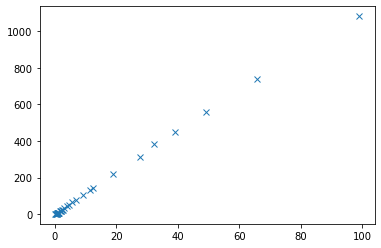

In [ ]:
c =  alpha_values/(1-alpha_values)
plt.plot(c,average_queue_M, 'x')

In [21]:
len(c)

32

[11.18026204 -0.52155102] [1708.63716165]


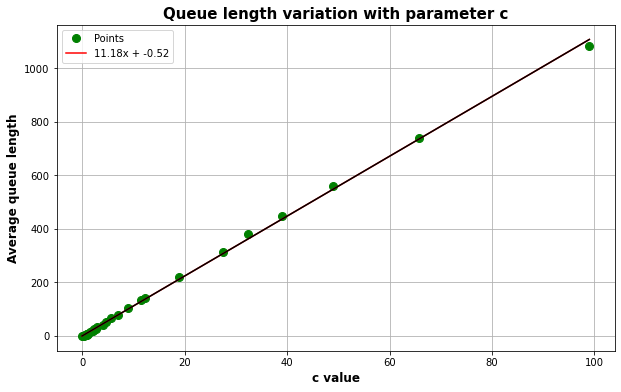

In [16]:
# Polynomial fit
deg = 1
x = c
y = average_queue_M

p, res, _, _, _ = np.polyfit(x, y, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(x, y,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(x)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("c value", weight='bold',fontsize=12)
plt.title("Queue length variation with parameter c", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(x, y,'black')

# plt.ylabel(r"$\bar{q}$", weight='bold',fontsize=15)
# plt.xlabel(r"$c$", weight='bold',fontsize=15)
plt.legend(["Points",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2))])
 

In [18]:
vals = np.unique(W)
print(vals)

[1.41421356 2.23606798 2.82842712 3.16227766 3.60555128 4.12310563
 4.24264069 4.47213595 5.         5.09901951 5.38516481 5.65685425
 5.83095189 6.40312424 7.07106781]


In [ ]:
np.(vals)

4.435373492156751

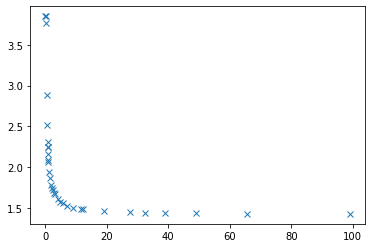

In [15]:
plt.plot(c,average_cost_M_actual,'x')

In [24]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

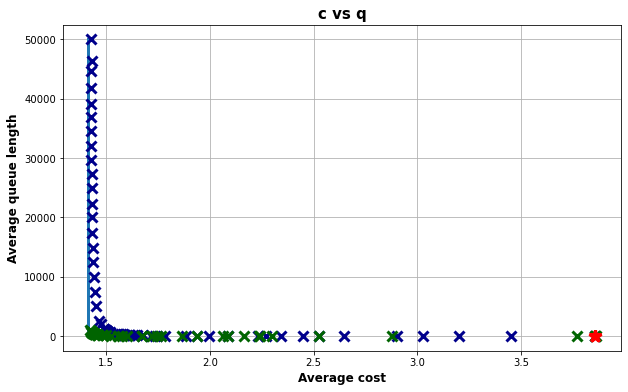

In [32]:
plt.figure( figsize=(10,6) ) 

# C = 0 Case

# C = Inf/Fluid Case
# ylim = max( max( average_queue_B ), max( average_queue_M ) )

plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,50000],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(average_cost_M,average_queue_M,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkgreen")
# Max Weight data
# plt.plot(average_cost_M, average_queue_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
# plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

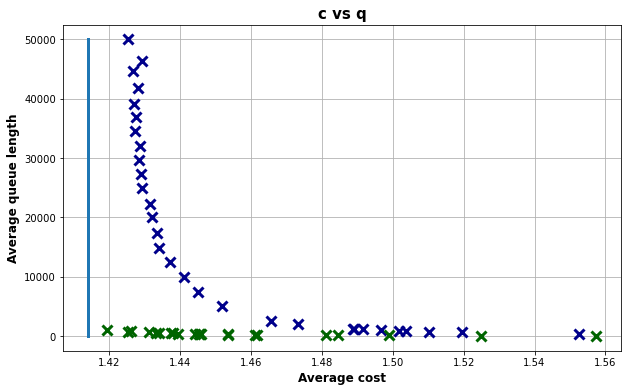

In [36]:
plt.figure( figsize=(10,6) ) 

# C = 0 Case

# C = Inf/Fluid Case
# ylim = max( max( average_queue_B ), max( average_queue_M ) )

plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,50000],linewidth = 3)
# Batching data
plt.plot(average_cost_B[30:],average_queue_B[30:],'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(average_cost_M[20:],average_queue_M[20:],'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkgreen")
# Max Weight data
# plt.plot(average_cost_M, average_queue_M,'go',markersize = 8)
# plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
# plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

In [26]:
Cstar = fluid_sol['Cost']

In [27]:
average_cost_B

array([3.85525434, 3.4506327 , 3.20230752, 3.02690614, 2.90290782,
       2.64531901, 2.52586586, 2.44635562, 2.34109354, 2.26937523,
       2.23338181, 2.08445769, 1.9962485 , 1.93637273, 1.88626051,
       1.78249351, 1.73497648, 1.71683789, 1.67905068, 1.64763575,
       1.63018593, 1.615607  , 1.6108613 , 1.59830301, 1.58690303,
       1.58416131, 1.58040503, 1.57226396, 1.56190504, 1.55630378,
       1.55251214, 1.51956601, 1.51028118, 1.50375768, 1.50173889,
       1.49685038, 1.49154054, 1.48904369, 1.48869362, 1.47333094,
       1.46578341, 1.45198798, 1.44515161, 1.44127115, 1.43725246,
       1.43420879, 1.43356361, 1.43201218, 1.43170252, 1.4292976 ,
       1.4291726 , 1.42840053, 1.42866524, 1.42722763, 1.42772383,
       1.42714435, 1.42805292, 1.42687036, 1.42929111, 1.42547469])

[-1.03132855  2.1763326 ] [0.16132052]
[-1.98808223  1.95447338] [0.34869979]


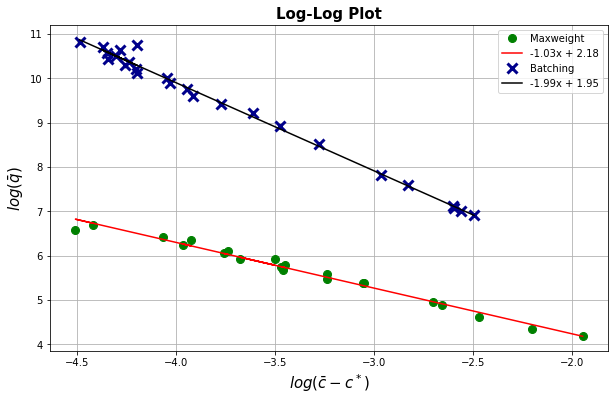

In [41]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[20:41]-Cstar)
yM2 = np.log(average_queue_M[20:41])
xB2 = np.log(average_cost_B[35:]-Cstar)
yB2 = np.log(average_queue_B[35:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching"
            , str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])
 

In [43]:
average_queue_B[35:]

array([ 1000.5,  1094.5,  1194.1,  1250.5,  2000.5,  2500.5,  5000.5,
        7475.5, 10000.5, 12500.5, 14900.5, 17350.5, 20000.5, 22325.5,
       25000.5, 27275.5, 29600.5, 32000.5, 34500.5, 36875.5, 39200.5,
       41850.5, 44600.5, 46375.5, 50000.5])

In [44]:
average_queue_M[20:41]

array([ 66.11743,  76.70484, 101.50661, 132.76162, 141.98968, 217.12631,
       217.77392, 239.41731, 266.91167, 292.72627, 312.63552, 328.40474,
       375.78524, 378.69529, 425.64272, 451.43863, 512.32472, 577.76318,
       616.64257, 714.18607, 814.61072])

In [45]:
average_cost_B[35:]

array([1.49685038, 1.49154054, 1.48904369, 1.48869362, 1.47333094,
       1.46578341, 1.45198798, 1.44515161, 1.44127115, 1.43725246,
       1.43420879, 1.43356361, 1.43201218, 1.43170252, 1.4292976 ,
       1.4291726 , 1.42840053, 1.42866524, 1.42722763, 1.42772383,
       1.42714435, 1.42805292, 1.42687036, 1.42929111, 1.42547469])

In [46]:
average_cost_M[20:41]

array([1.55725847, 1.52494654, 1.49902874, 1.48465998, 1.48131181,
       1.46169582, 1.46125464, 1.4535471 , 1.45346777, 1.44575143,
       1.44541519, 1.4459692 , 1.43956801, 1.44438907, 1.43762554,
       1.4380578 , 1.43318699, 1.43397874, 1.43142461, 1.42524339,
       1.42626179])

In [61]:
W

array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 5.09901951,
        2.23606798, 2.82842712, 3.60555128, 4.47213595, 5.38516481,
        3.16227766, 3.60555128, 4.24264069, 5.        , 5.83095189,
        4.12310563, 4.47213595, 5.        , 5.65685425, 6.40312424,
        5.09901951, 5.38516481, 5.83095189, 6.40312424, 7.07106781],
       [2.23606798, 1.41421356, 2.23606798, 3.16227766, 4.12310563,
        2.82842712, 2.23606798, 2.82842712, 3.60555128, 4.47213595,
        3.60555128, 3.16227766, 3.60555128, 4.24264069, 5.        ,
        4.47213595, 4.12310563, 4.47213595, 5.        , 5.65685425,
        5.38516481, 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [3.16227766, 2.23606798, 1.41421356, 2.23606798, 3.16227766,
        3.60555128, 2.82842712, 2.23606798, 2.82842712, 3.60555128,
        4.24264069, 3.60555128, 3.16227766, 3.60555128, 4.24264069,
        5.        , 4.47213595, 4.12310563, 4.47213595, 5.        ,
        5.83095189, 5.38516481, 5.09901951, 5.

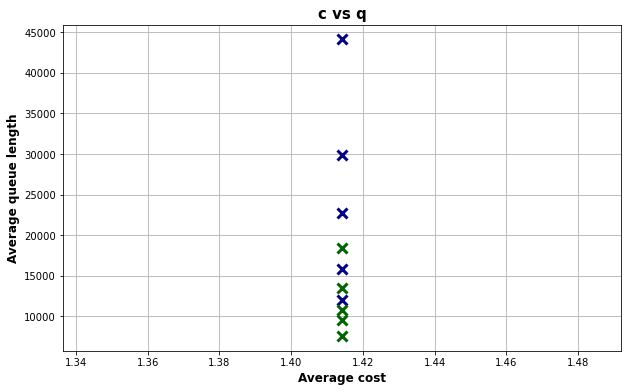

In [5]:
plt.figure( figsize=(10,6) ) 

# C = 0 Case

# C = Inf/Fluid Case
# ylim = max( max( average_queue_B ), max( average_queue_M ) )

# plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_M2,average_queue_M2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(average_cost_M2_2,average_queue_M2_2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkgreen")
# Max Weight data
# plt.plot(average_cost_M, average_queue_M,'go',markersize = 8)
# plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
# plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

In [6]:
file_name = "../longest_spatial_uniform_25_all_good.pkl"
with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [36]:
Cstar = fluid_sol['Cost']

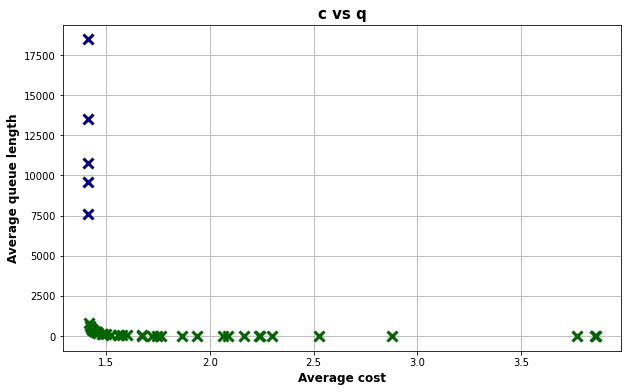

In [7]:
plt.figure( figsize=(10,6) ) 

# C = 0 Case

# C = Inf/Fluid Case
# ylim = max( max( average_queue_B ), max( average_queue_M ) )

# plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_M2_2,average_queue_M2_2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
plt.plot(average_cost_M,average_queue_M,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkgreen")
# Max Weight data
# plt.plot(average_cost_M, average_queue_M,'go',markersize = 8)
# plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
# plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

In [12]:
average_cost_M2_2

array([1.39835457, 1.39498874, 1.38270347, 1.38395505, 1.34018231])

In [15]:
(0.96)/(1-0.96)*1.414

33.93599999999997

In [14]:
fluid_sol

{'X': array([[4.00000000e-02, 2.61733874e-13, 6.07577372e-14, 3.65285898e-14,
         2.83205067e-14, 2.61733609e-13, 1.00603991e-13, 5.08995674e-14,
         3.59038058e-14, 2.70599345e-14, 6.07579329e-14, 5.08994375e-14,
         3.63299941e-14, 3.11563068e-14, 2.52470136e-14, 3.65283211e-14,
         3.59039519e-14, 3.11563017e-14, 2.70697869e-14, 2.31940783e-14,
         2.83201276e-14, 2.70602511e-14, 2.52466244e-14, 2.31940073e-14,
         2.12600785e-14],
        [2.61733841e-13, 4.00000000e-02, 2.56643465e-13, 5.91676681e-14,
         3.65285724e-14, 8.16077346e-14, 2.22968530e-13, 9.58276982e-14,
         5.23504405e-14, 3.27900525e-14, 4.62377873e-14, 6.94934392e-14,
         4.40100897e-14, 3.84039420e-14, 2.91539785e-14, 3.27902080e-14,
         4.06162414e-14, 3.55941586e-14, 3.08676337e-14, 2.56863961e-14,
         2.70599622e-14, 2.83816637e-14, 2.70091372e-14, 2.49949159e-14,
         2.31940784e-14],
        [6.07582425e-14, 2.56644004e-13, 4.00000000e-02, 2.56643787

In [31]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [32]:
average_queue_M

array([814.61072, 616.64257, 512.32472, 425.64272, 375.78524, 328.40474,
       292.72627, 266.91167, 239.41731, 217.77392, 217.12631, 141.98968,
       132.76162, 101.50661,  76.70484,  66.11743,  51.94034,  41.47543,
        25.05616,  32.57472,  24.10088,  19.51087,  18.93589,  15.5262 ,
         8.12446,   7.15301,   6.90919,   6.28548,   4.23885,   4.25567,
         3.9613 ,   2.96555,   1.95611,   1.04434,   1.     ,   1.     ])

In [33]:
average_cost_M

array([1.41557908, 1.42242095, 1.42597806, 1.43132874, 1.43336347,
       1.44098061, 1.44131298, 1.44938353, 1.44995684, 1.45764534,
       1.45871396, 1.47917872, 1.48272992, 1.49743977, 1.52395532,
       1.55624625, 1.57414252, 1.59822422, 1.67196732, 1.67204165,
       1.71901123, 1.74487963, 1.76569474, 1.86647754, 1.93784532,
       2.06174826, 2.08812522, 2.16153194, 2.23564137, 2.24283212,
       2.29692117, 2.52470837, 2.87574033, 3.76850157, 3.85504101,
       3.85896337])

In [40]:
file_name = "../large_queue_25.pkl"
with open(file_name,'rb') as f:
        average_cost_B2_, average_queue_B2, average_cost_B2,  N, W, pmf_cust, pmf_serv = pickle.load(f)

file_name = "../large_queue_25_2.pkl"
with open(file_name,'rb') as f:
        average_cost_B2_2_, average_queue_B2_2, average_cost_B2_2, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [43]:
# Polynomial fit
deg = 1

# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B2)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B2[sorted_indices]
average_queue_B = average_queue_B2[sorted_indices]



xB = np.log(average_cost_B2_2 - Cstar)
yB = np.log(average_queue_B2)

c:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


In [47]:
average_cost_B2_

array([0.08100157, 0.06728972, 0.05783476, 0.0403368 , 0.03342638,
       0.0296899 , 0.0255492 , 0.02446199, 0.02313304, 0.02175698,
       0.0193091 , 0.01610368, 0.01686457, 0.01633145, 0.0152915 ,
       0.01590208, 0.01435378, 0.01374011, 0.01452638, 0.0149533 ,
       0.01251626, 0.01155993])

In [48]:
Cstar

1.414213562444884